In [4]:
library(ggplot2)

In [1]:
df <- read.csv("../output/tfidf_by_speaker_trimmed.csv")

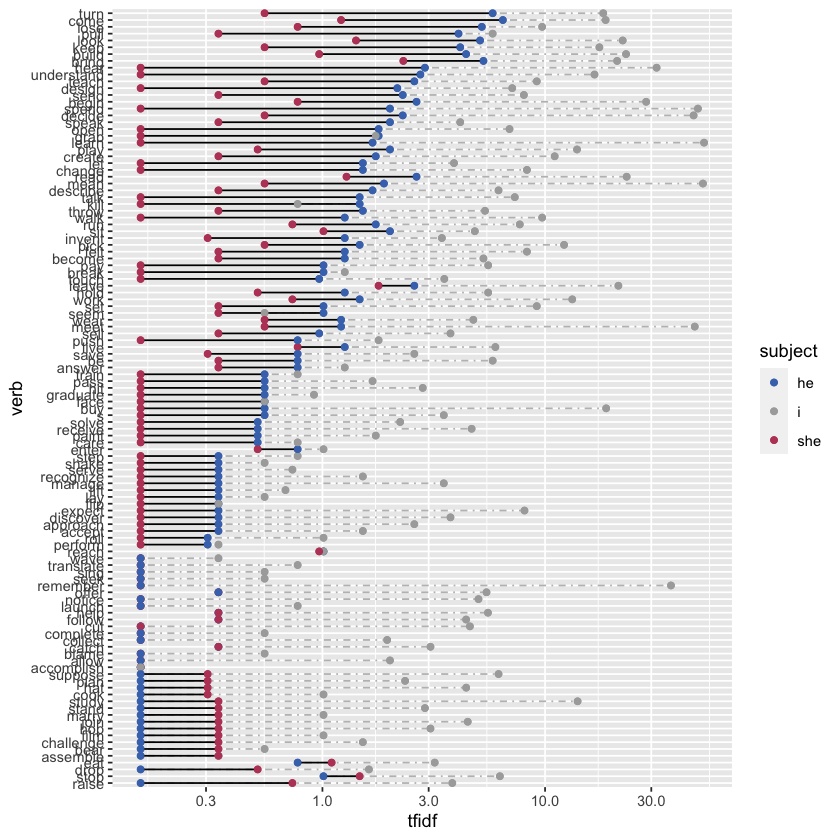

In [10]:
# Male speakers

# Extract the male speakers
man_df <- df[df$speaker_gender == "man",]

# Start building the difference data frame. This will be used to order 
# the data frame
# First merge he and she subjects
man_diff <- merge(man_df[man_df$subject == "he",], 
                  man_df[man_df$subject == "she",], 
                 by='verb')
# Add the i's
man_diff <- merge(man_diff,
                  man_df[man_df$subject == "i",], 
                  by='verb')
# He's are .x, She's are .y, and I's have no dot
man_diff['hs_diff'] <- man_diff$tfidf.x - man_diff$tfidf.y

# From the extracted male speakers, turn the verb into factors, ordered by the difference
man_df$verb <-factor(man_df$verb, 
                     levels = man_diff$verb[order(man_diff$tfidf)])
man_df$verb <-factor(man_df$verb, 
                   levels = man_diff$verb[order(man_diff$hs_diff)])
# Remove NANs
man_df <- man_df[!is.na(man_df$verb),]

ggplot(man_df, aes(x=tfidf, y=verb, color=subject)) +
  geom_point() + 
  scale_x_log10() + 
  geom_segment(data=man_diff, aes(x=tfidf.x, xend=tfidf, y=verb, yend=verb), color="grey", linetype = "dotdash") +
  geom_segment(data=man_diff, aes(x=tfidf.x, xend=tfidf.y, y=verb, yend=verb), color="black") +
  geom_point() + scale_color_manual(values=c("#4775ba", "#aaaaaa","#ba4767"))

ggsave("../output/he_spkrs_jl.png", width=4, height = 20, units="in")

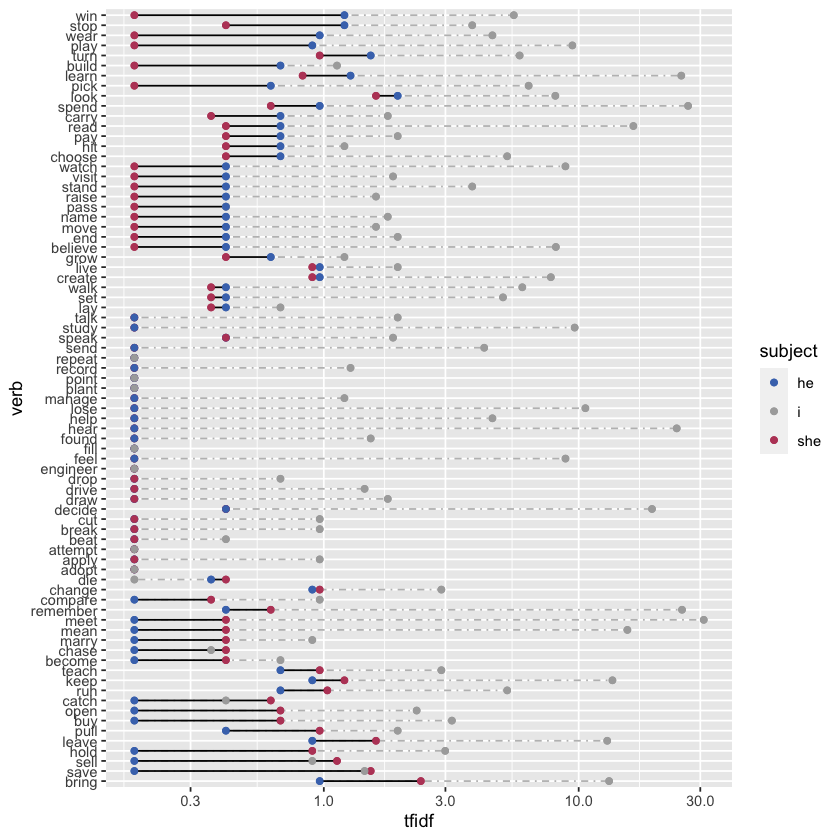

In [9]:
# Female speakers

woman_df <- df[df$speaker_gender == "woman",]
woman_diff <- merge(woman_df[woman_df$subject == "he",], 
                    woman_df[woman_df$subject == "she",], 
                  by='verb')
woman_diff <- merge(woman_diff,
                    woman_df[woman_df$subject == "i",], 
                  by='verb')
woman_diff['hs_diff'] <- woman_diff$tfidf.x - woman_diff$tfidf.y

# From the extracted female speakers, turn the verb into factors, ordered by the difference
woman_df$verb <-factor(woman_df$verb, 
                     levels = woman_diff$verb[order(woman_diff$tfidf)])
woman_df$verb <-factor(woman_df$verb, 
                     levels = woman_diff$verb[order(woman_diff$hs_diff)])
# Remove NANs
woman_df <- woman_df[!is.na(woman_df$verb),]

ggplot(woman_df, aes(x=tfidf, y=verb, color=subject)) +
  geom_point() + 
  scale_x_log10() + 
  geom_segment(data=woman_diff, aes(x=tfidf.x, xend=tfidf, y=verb, yend=verb), color="grey", linetype = "dotdash") +
  geom_segment(data=woman_diff, aes(x=tfidf.x, xend=tfidf.y, y=verb, yend=verb), color="black") +
  geom_point() + scale_shape_manual(values=c(0, 1, 2)) + scale_color_manual(values=c("#4775ba", "#aaaaaa","#ba4767"))

ggsave("../output/she_spkrs_jl.png", width=4, height = 20, units="in")